In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import seaborn as sns
from scipy import signal
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm, Normalize
import random
from queue import Queue

In [31]:
def moment(img, order_p, order_q, fg_val):
    Mpq = 0.0
    (height, width) = img.shape
    for h in range(height):
        for w in range(width):
            if(img[h,w]==fg_val):
                Mpq += ((w**order_p)*(h**order_q))
    return Mpq

In [32]:
def central_moment(img, order_p, order_q, fg_val):
    m_00 = moment(img, 0, 0, fg_val)
    x_ctr = moment(img, 1, 0, fg_val) / m_00
    y_ctr = moment(img, 0, 1, fg_val) / m_00
    (height, width) = img.shape
    cMpq = 0.0
    for h in range(height):
        for w in range(width):
            if(img[h,w]==fg_val):
                cMpq += ((w-x_ctr)**order_p)*((h-y_ctr)**order_q)
    return cMpq

In [33]:
def normalized_central_moment(img, order_p, order_q, fg_val):
    m_00 = moment(img, 0, 0, fg_val)
    norm = m_00 ** (0.5*(order_p+order_q+2))
    return central_moment(img, order_p, order_q, fg_val)/norm

In [41]:
def compute_degree(img, fg_value):
    cm_11 = central_moment(img, 1, 1, fg_value)
    cm_20 = central_moment(img, 2, 0, fg_value)
    cm_02 = central_moment(img, 0, 2, fg_value)
    img_rotate_degree = math.degrees(0.5*math.atan2(2*cm_11, cm_20-cm_02))
    return img_rotate_degree

In [45]:
bolt_img = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch10\bolt-clean.tif")[:,:,0]

(224, 250)


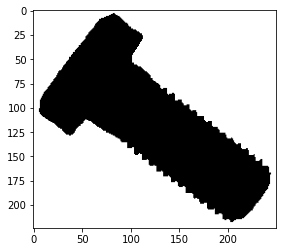

In [46]:
print(bolt_img.shape)
plt.imshow(bolt_img, cmap="gray")
plt.show()

In [47]:
bolt_img_rotate_degree = compute_degree(bolt_img, 0)
print(bolt_img_rotate_degree)

37.404351266820434


In [36]:
rect_img = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch10\roundness-2-200.tif")[:,:,0]

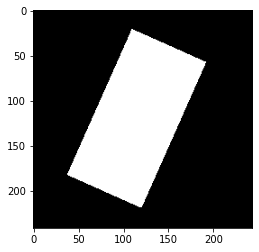

In [37]:
plt.imshow(rect_img, cmap="gray")
plt.show()

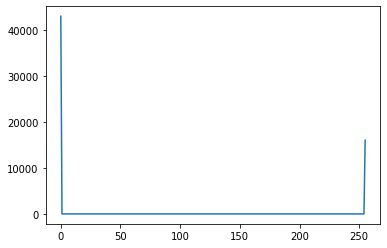

In [38]:
hist_rect = cv2.calcHist([rect_img], [0], None, [256], [0, 256])
plt.plot(hist_rect)
plt.show()

In [44]:
rect_img_rotate_degree = compute_degree(rect_img, 255)
print(rect_img_rotate_degree)

-66.10588766214663


![ch10_mmbased_geoprop](../assets/ch10_mmbased_geoprop.png)